<a href="https://colab.research.google.com/github/adalbertii/Seci-konwolucyjne/blob/main/augmentation-layer-01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

def convert_image(file):
   return np.array(Image.open(file))

In [2]:
image = convert_image(r'/content/drive/MyDrive/dane/tymek-02.jpg')
image.shape

(1024, 768, 3)

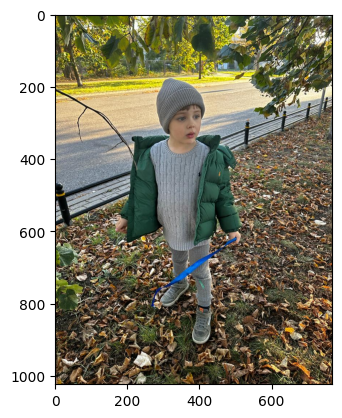

In [3]:
plt.imshow(image)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

x = np.expand_dims(image, 0)
x.shape

(1, 1024, 768, 3)

In [5]:
y = np.asarray(['tymek'])

In [6]:
datagen = ImageDataGenerator(
   width_shift_range=0.2,  # przesunięcie wzdłuż osi x
   height_shift_range=0.2, # przesunięcie wzdłuż osi y
   rotation_range=20,      # rotacja
   horizontal_flip=True,   # odwrócenie poziome
   vertical_flip = True,   # odwrócenie pionowe
   rescale=1./255,         # parametr niezbędny, aby dobrze zwizualizować dane
   shear_range=0.25,       # przycinanie obrazu
   zoom_range=0.25,        # zoom
)

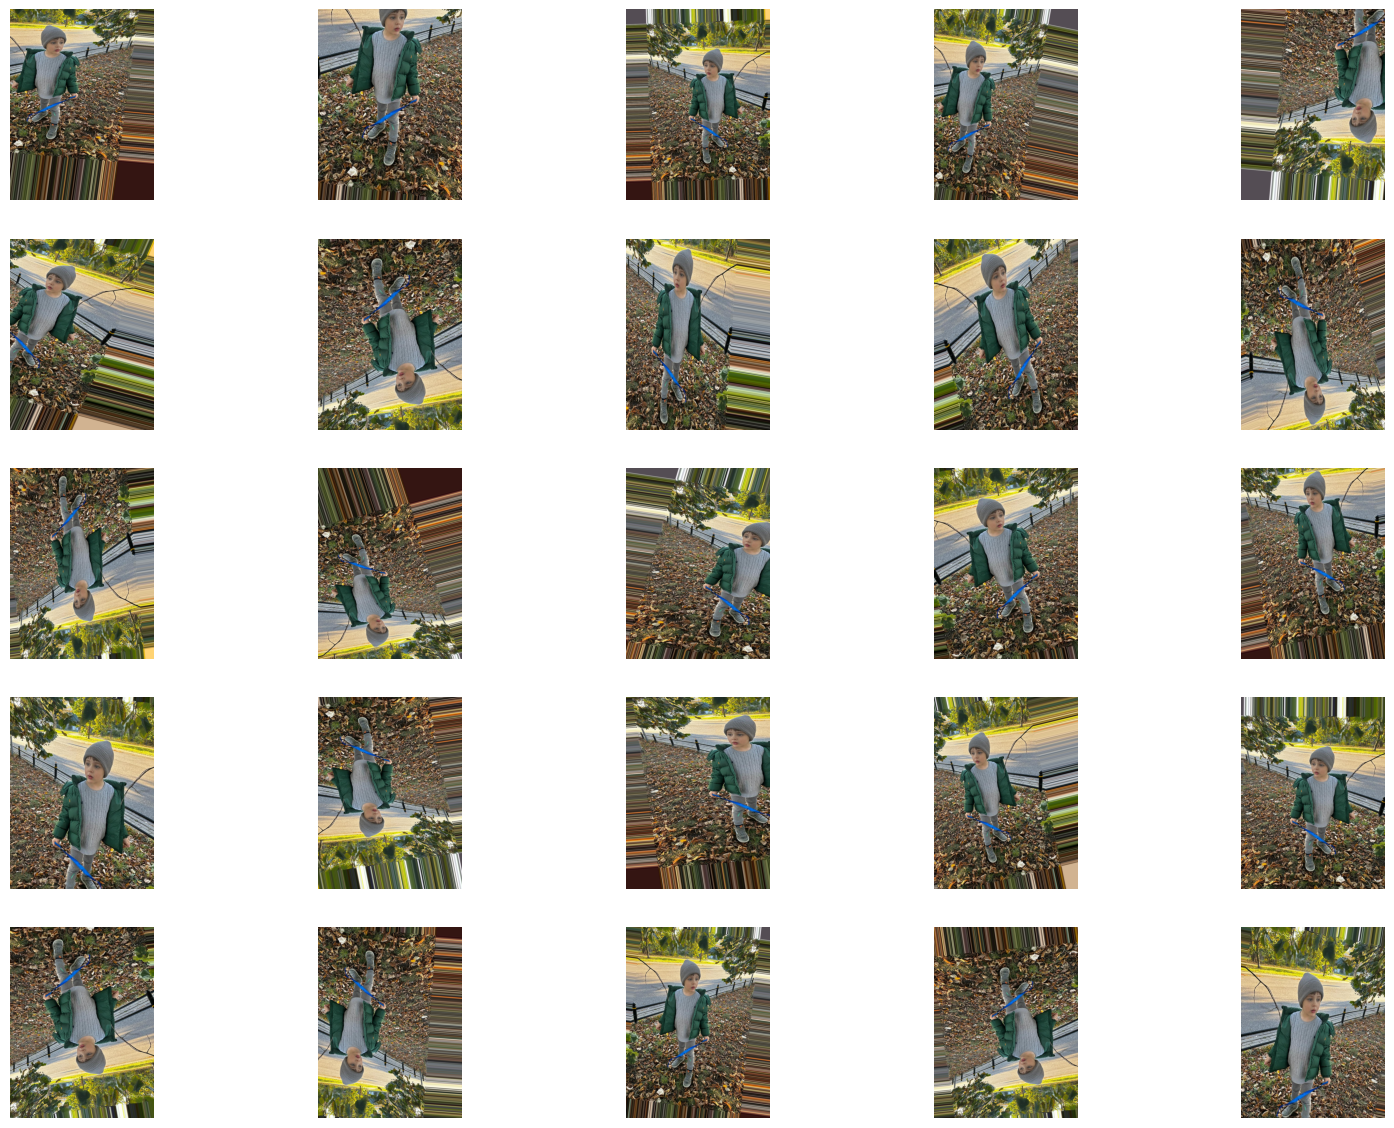

In [7]:
figure = plt.figure()
i = 0
for x_batch, y_batch in datagen.flow(x, y):
   a = figure.add_subplot(5, 5, i + 1)
   plt.imshow(np.squeeze(x_batch))
   a.axis('off')
   if i == 24: break
   i += 1
figure.set_size_inches(np.array(figure.get_size_inches()) * 3)
plt.show()